<a href="https://colab.research.google.com/github/youssefbourais0310/Neural_Networks/blob/main/indor_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
from keras.applications import xception
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16
import tensorflow as tf
import datetime as dt
import random
from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm import tqdm
import datetime
import tensorflow_hub as hub

In [2]:
labels_csv = pd.read_csv("/content/drive/MyDrive/YOUSSEF.csv")
# labels_csv.drop(labels_csv.filter(regex="Unnamed: 0"),axis=1, inplace=True)
labels_csv

,id,breeds
0,1355932_in,Pelargonium_graveolens
1,1355955_in,Pelargonium_odoratissimum
2,1355959_in,Pelargonium_peltatum
3,1355978_in,Pelargonium_zonale
4,1355990_in,Mercurialis_annua
...,...,...
291,1694631_in,Coussapoa_villosa
292,1697991_in,Cyphostemma_juttae
293,1711751_in,Nepenthes_alata
294,1711753_in,Nepenthes_truncata


In [3]:
import os
print(os.listdir("/content/drive/MyDrive/indor"))

['data.xlsx', 'val_indor', 'test_indor', 'train_indor']


In [19]:
CATEGORIES = [ 'Pelargonium_graveolens','Pelargonium_odoratissimum',	'Pelargonium_peltatum', 	'Pelargonium_zonale', 	'Mercurialis_annua', 	'Phyllanthus_tenellus', 
 'Hypericum_perforatum', 	'Tradescantia_fluminensis',  	'Lavandula_dentata', 	'Nephrolepis_cordifolia', 	'Nephrolepis_exaltata',
 	'Osmunda_regalis', 	'Lithodora_fruticosa', 	'Vaccaria_hispanica', 	'Calendula_stellata', 	'Sedum_acre', 	'Sedum_album', 	'Sedum_andegavense',
 	'Sedum_brevifolium', 	'Sedum_caeruleum', 	'Sedum_cepaea', 	'Sedum_dasyphyllum', 	'Sedum_forsterianum', 	'Sedum_hirsutum', 	'Sedum_litoreum',
 	'Sedum_multiceps', 	'Sedum_rubens', 	'Sedum_sediforme', 	'Lavandula_stoechas', 	'Galega_officinalis', 	'Alcea_rosea', 	'Hunnemannia_fumariifolia',
 	'Papaver_rupifragum', 	'Anemone_coronaria', 	'Oldenlandia_corymbosa', 	'Pancratium_canariense', 	'Oncostema_elongata', 	'Oncostema_peruviana',
 	'Ophrys_tenthredinifera', 	'Lavandula_angustifolia', 	'Nymphaea_lotus', 	'Freesia_refracta', 	'Tradescantia_pallida', 	'Schefflera_actinophylla',
 	'Anemone_hortensis', 	'Tradescantia_cerinthoides', 	'Sedum_hispanicum', 	'Trifolium_repens', 	'Centranthus_ruber', 	'Guizotia_abyssinica', 	'Tagetes_patula',
 	'Lupinus_perennis', 	'Lupinus_polyphyllus', 	'Trachelospermum_jasminoides', 	'Tradescantia_spathacea', 	'Mussaenda_erythrophylla', 	'Gynura_aurantiaca',
 	'Gynura_procumbens',  'Tagetes_erecta', 	  'Phyllanthus_amarus', 	'Triadica_sebifera', 	'Petiveria_alliacea', 	'Peperomia_pellucida', 	'Mecardonia_procumbens',
 	'Browallia_americana', 	'Zamioculcas_zamiifolia', 	'Ansellia_africana', 	'Phedimus_aizoon', 	'Phedimus_spurius', 	'Cereus_jamacaru',
 	'Sedum_pachyphyllum', 	'Sedum_dendroideum', 	'Tagetes_tenuifolia', 	'Calendula_arvensis', 	'Carthamus_carduncellus', 	'Dorotheanthus_bellidiformis',
 	'Fragaria_moschata', 	'Freesia_x_hybrida',	'Hebe_andersonii', 	'Hebe_salicifolia', 	'Hypericum_calycinum', 	'Lamium_maculatum',
 	'Lavandula_x_intermedia', 	'Lavandula_latifolia', 	'Limnanthes_douglasii', 	'Lupinus_arboreus',	'Anemone_apennina', 	'Papaver_croceum',
 	'Papaver_orientale', 	'Pelargonium_x_hybridum', 	'Pelargonium_inquinans', 	'Diascia_rigescens', 	'Sedum_kamtschaticum', 	'Sedum_mexicanum',
 	'Sedum_ochroleucum', 	'Sedum_sexangulare', 	'Tradescantia_x_andersoniana', 	'Tradescantia_virginiana', 	'Honckenya_peploides', 	'Sedum_atratum', 
 	'Freesia_alba', 	'Cobaea_scandens', 	'Sedum_palmeri',	'Tradescantia_zebrina', 	'Dryopteris_erythrosora', 	'Anemone_blanda', 	'Hypericum_patulum', 	'Hypericum_x_hidcoteense',
 	'Perovskia_atriplicifolia', 	'Alcea_setosa', 	'Lamium_orvala',	'Lavandula_pinnata', 	'Barbarea_rupicola', 	'Nephrolepis_biserrata',
 	'Phyllanthus_urinaria', 	'Anthurium_hookeri', 	'Anthurium_jenmanii', 	'Anthurium_scandens', 	'Crotalaria_retusa', 	'Peperomia_magnoliifolia', 	'Peperomia_obtusifolia',
 	'Peperomia_quadrangularis', 	'Peperomia_rotundifolia', 	'Peperomia_serpens', 	'Urera_baccifera', 	'Pereskia_bleo', 	'Cereus_hexagonus', 	'Vanilla_planifolia',
 	'Asystasia_gangetica', 	'Piriqueta_cistoides', 	'Acalypha_wilkesiana', 	'Breynia_disticha', 	'Acalypha_indica', 	'Anthurium_crystallinum', 	'Alocasia_cucullata',
 	'Alocasia_longiloba', 	'Alocasia_macrorrhizos', 	'Fragaria_x_ananassa', 	'Nephrolepis_abrupta', 	'Pelargonium_x_asperum', 	'Pereskia_grandifolia', 	'Phyllanthus_emblica',
 	'Phyllanthus_niruroides', 	'Pongamia_pinnata', 	'Acalypha_hispida', 	'Acalypha_integrifolia', 	'Stemodia_verticillata',  'Trimezia_martinicensis',
 	'Cereus_repandus', 	'Schefflera_arboricola', 	'Fragaria_chiloensis', 	'Aphelandra_squarrosa',	'Pereskia_aculeata', 	'Peperomia_argyreia',
  'Peperomia_caperata', 'Anthurium_andraeanum', 	'Anthurium_scherzerianum', 	'Zamia_furfuracea', 	'Dendrobium_nobile', 	'Nandina_domestica',
	'Crotalaria_pumila', 	'Dendrobium_chrysotoxum', 	'Dendrobium_moschatum', 	'Fittonia_albivenis', 	'Selenicereus_anthonyanus', 	'Selenicereus_grandiflorus',
 	'Acalypha_aristata', 	'Daucus_pusillus', 	'Diervilla_lonicera', 	'Dryopteris_cristata', 	'Dryopteris_intermedia', 	'Hypericum_prolificum', 
 	'Mertensia_maritima', 	'Mertensia_paniculata', 	'Nymphaea_odorata', 	'Papaver_nudicaule', 	'Sedum_divergens', 	'Sedum_oreganum', 	'Sedum_spathulifolium',
 	'Sedum_ternatum', 	'Tradescantia_occidentalis', 	'Tradescantia_ohiensis', 	'Barbarea_vulgaris', 	'Nepenthes_vieillardii', 	'Dendrobium_closterium', 	'Schefflera_spp.',
 	'Tagetes_lucida', 	'Lithops_fulviceps', 	'Lithops_karasmontana', 	'Lithops_marmorata', 	'Lithops_pseudotruncatella', 	'Lithops_spp.', 	'Sedum_lineare',
 	'Sedum_morganianum', 	'Garrya_elliptica', 	'Pelargonium_crispum', 	'Pelargonium_x_hortorum', 	'Loropetalum_chinense', 	'Liriope_muscari', 'Dendrobium_spp.',
 	'Peperomia_dolabriformis', 	'Hebe_franciscana',	'Browallia_speciosa', 	'Alocasia_cuprea', 	'Alocasia_micholitziana',
 	'Alocasia_odora', 	'Alocasia_sanderiana', 	'Nepenthes_spp.', 	'Pelargonium_spp.',	'Nephrolepis_falcata', 
 	'Pelargonium_grandiflorum', 	'Dischidia_nummularia', 	'Schefflera_heptaphylla', 	'Herbertia_lahue', 	'Pelargonium_panduriforme',
 	'Sedum_albomarginatum', 	'Sedum_glaucophyllum', 	'Sedum_laxum', 	'Sedum_moranense', 	'Sedum_niveum', 	'Sedum_obtusatum', 	'Sedum_pulchellum', 	'Calochortus_eurycarpus',
 	'Calochortus_gunnisonii', 	'Calochortus_leichtlinii', 	'Calochortus_luteus', 	'Calochortus_splendens', 	'Calochortus_tolmiei', 	'Diervilla_sessilifolia',
 	'Hackelia_velutina', 	'Lithops_aucampiae', 	'Lithops_olivacea', 	'Cyrtanthus_elatus', 	'Dischidia_ovata', 	'Alocasia_baginda', 	'Alocasia_lauterbachiana', 	'Alocasia_reginula',
 	'Alocasia_wentii', 	'Alocasia_zebrina', 	'Anthurium_clarinervium', 	'Anthurium_faustomirandae', 	'Anthurium_salvinii', 	'Anthurium_schlechtendalii', 	'Anthurium_veitchii',
 	'Anthurium_warocqueanum', 	'Cereus_forbesii', 	'Cereus_uruguayanus', 	'Coryphantha_elephantidens', 	'Pilosocereus_chrysostele', 	'Pilosocereus_pachycladus',
 	'Stenocactus_multicostatus', 	'Tephrocactus_geometricus', 	'Cyanotis_somaliensis', 	'Tradescantia_sillamontana', 	'Leucophyta_brownii',
 	'Othonna_capensis', 	'Sedum_adolphii', 	'Sedum_allantoides', 	'Sedum_burrito', 	'Sedum_clavatum', 	'Sedum_compressum', 	'Sedum_cyaneum', 	'Sedum_decumbens', 	'Sedum_furfuraceum',
 	'Sedum_hernandezii', 	'Sedum_japonicum', 	'Sedum_makinoi', 	'Sedum_nussbaumerianum', 	'Sedum_praealtum', 	'Sedum_rubrotinctum', 	'Uncinia_rubra', 	'Acalypha_macrostachya',
 	'Pelargonium_echinatum', 	'Lupinus_nootkatensis', 	'Nepenthes_mirabilis', 	'Nepenthes_x_neglecta', 	'Dendrobium_munificum', 	'Dendrobium_thyrsiflorum',
 	'Dendrobium_victoriae-reginae',	'Erycina_pusilla', 	'Peperomia_albovittata', 	'Peperomia_clusiifolia', 	'Peperomia_columella',	'Peperomia_ferreyrae', 	'Peperomia_graveolens',
	'Peperomia_maculosa', 	'Peperomia_pecuniifolia', 	'Peperomia_polybotrya', 	'Peperomia_prostrata', 	'Peperomia_tetragona',	'Peperomia_verticillata',
 	'Coussapoa_villosa',	'Cyphostemma_juttae', 	'Nepenthes_alata', 	'Nepenthes_truncata', 	'Aphelandra_aurantiaca' ]

In [13]:
NUM_CATEGORIES = len(CATEGORIES)
print(NUM_CATEGORIES)

296


In [6]:
# # Unzip the uploaded data into google drive 
# !unzip "/content/drive/MyDrive/train_indor.zip" -d "drive/MyDrive/trainn_indorr/"

In [7]:
labels_csv = pd.read_csv("/content/drive/MyDrive/YOUSSEF.csv")
labels_csv
# labels_csv.drop(labels_csv.filter(regex="Unnamed: 0"),axis=1, inplace=True)
# labels_csv
path='/content/drive/MyDrive/trainn_indorr/train_indor'
folders= sorted(os.listdir(path))
len(folders)
for i in range(296):
    originale=path+'/'+folders[i]
    print("old file:",originale)
    new=path+'/'+labels_csv['breeds'][i]
    print("new file:",new)
    # os.rename(originale,new)


old file: /content/drive/MyDrive/trainn_indorr/train_indor/Acalypha_aristata
new file: /content/drive/MyDrive/trainn_indorr/train_indor/Pelargonium_graveolens
old file: /content/drive/MyDrive/trainn_indorr/train_indor/Acalypha_hispida
new file: /content/drive/MyDrive/trainn_indorr/train_indor/Pelargonium_odoratissimum
old file: /content/drive/MyDrive/trainn_indorr/train_indor/Acalypha_indica
new file: /content/drive/MyDrive/trainn_indorr/train_indor/Pelargonium_peltatum
old file: /content/drive/MyDrive/trainn_indorr/train_indor/Acalypha_integrifolia
new file: /content/drive/MyDrive/trainn_indorr/train_indor/Pelargonium_zonale
old file: /content/drive/MyDrive/trainn_indorr/train_indor/Acalypha_macrostachya
new file: /content/drive/MyDrive/trainn_indorr/train_indor/Mercurialis_annua
old file: /content/drive/MyDrive/trainn_indorr/train_indor/Acalypha_wilkesiana
new file: /content/drive/MyDrive/trainn_indorr/train_indor/Phyllanthus_tenellus
old file: /content/drive/MyDrive/trainn_indorr/tr

In [22]:
SAMPLE_PER_CATEGORY = 2000
data_dir = '/content/drive/MyDrive/train_indor'
train_dir = os.path.join(data_dir, '/content/drive/MyDrive/trainn_indorr/train_indor')
# test_dir = os.path.join(data_dir, '/content/drive/MyDrive/indor/test_indor')

In [23]:
for category in CATEGORIES:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))

Pelargonium_graveolens 1716 images
Pelargonium_odoratissimum 14 images
Pelargonium_peltatum 224 images
Pelargonium_zonale 2653 images
Mercurialis_annua 1224 images
Phyllanthus_tenellus 91 images
Hypericum_perforatum 6140 images
Tradescantia_fluminensis 1040 images
Lavandula_dentata 704 images
Nephrolepis_cordifolia 389 images
Nephrolepis_exaltata 550 images
Osmunda_regalis 312 images
Lithodora_fruticosa 473 images
Vaccaria_hispanica 292 images
Calendula_stellata 79 images
Sedum_acre 1700 images
Sedum_album 2468 images
Sedum_andegavense 20 images
Sedum_brevifolium 63 images
Sedum_caeruleum 79 images
Sedum_cepaea 79 images
Sedum_dasyphyllum 620 images
Sedum_forsterianum 184 images
Sedum_hirsutum 92 images
Sedum_litoreum 8 images
Sedum_multiceps 8 images
Sedum_rubens 64 images
Sedum_sediforme 1570 images
Lavandula_stoechas 1534 images
Galega_officinalis 428 images
Alcea_rosea 4285 images
Hunnemannia_fumariifolia 5 images
Papaver_rupifragum 5 images
Anemone_coronaria 677 images
Oldenlandia

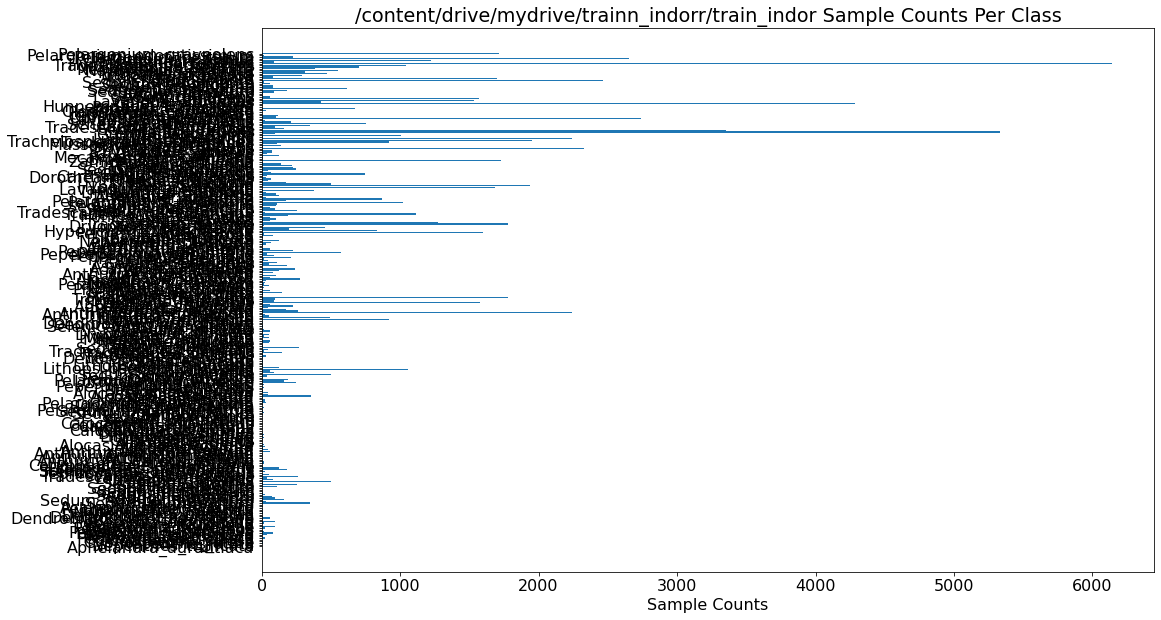

In [25]:
sample_counts= {}
train = "/content/drive/MyDrive/trainn_indorr/train_indor"

for i, d in enumerate([train]):

    classes= []
    sample_counts[d]= []

    for f in os.listdir(d):
        train_class_path= os.path.join(d, f)
        if os.path.isdir(train_class_path):
            classes.append(f)
            sample_counts[d].append(len(os.listdir(train_class_path)))

    #fig, ax= plt.subplot(221+i)
    fig, ax = plt.subplots()

    # Example data
    y_pos = np.arange(len(classes))

    ax.barh(y_pos, sample_counts[d], align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(classes)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Sample Counts')
    ax.set_title('{} Sample Counts Per Class'.format(d.capitalize()))

plt.show()

In [26]:
train = []
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir, category)):
        train.append(['/content/drive/MyDrive/trainn_indorr/train_indor/{}/{}'.format(category, file), category_id, category])
train = pd.DataFrame(train, columns=['file', 'category_id', 'category'])
# train.head()
train.shape
train

,file,category_id,category
0,/content/drive/MyDrive/trainn_indorr/train_ind...,0,Pelargonium_graveolens
1,/content/drive/MyDrive/trainn_indorr/train_ind...,0,Pelargonium_graveolens
2,/content/drive/MyDrive/trainn_indorr/train_ind...,0,Pelargonium_graveolens
3,/content/drive/MyDrive/trainn_indorr/train_ind...,0,Pelargonium_graveolens
4,/content/drive/MyDrive/trainn_indorr/train_ind...,0,Pelargonium_graveolens
...,...,...,...
89959,/content/drive/MyDrive/trainn_indorr/train_ind...,294,Nepenthes_truncata
89960,/content/drive/MyDrive/trainn_indorr/train_ind...,294,Nepenthes_truncata
89961,/content/drive/MyDrive/trainn_indorr/train_ind...,294,Nepenthes_truncata
89962,/content/drive/MyDrive/trainn_indorr/train_ind...,295,Aphelandra_aurantiaca
